odict_keys(['LatLon', 'NbLatitudes', 'NbLongitudes', 'LatLonMin', 'LatLonStep', 'Grid_0001'])
<class 'numpy.ma.core.MaskedArray'>


<a list of 36 text.Text objects>

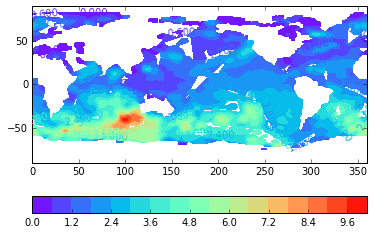

In [72]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = netCDF4.Dataset('/home/giuli/Descargas/nrt_merged_mswh_20160731_20160731_20160803.nc') 
print(A.variables.keys()) # Nombres de las variables
lat,long = A.variables['NbLatitudes'][:], A.variables['NbLongitudes'][:] # Defino Latitud y Longitud (tipo netcdf)
hs = A.variables['Grid_0001'][:] # Defino la altura significativa (tipo netcdf)
print(type(hs))
hst=hs.T
#print(hs[1,1:100])
#plt.contourf(lat,long,hs)
#plt.plot(hs[:,15])
%matplotlib inline
cs = plt.contourf(long,lat,hst,18,cmap=plt.cm.rainbow)
plt.axis([0, 360, -90, 90])
plt.colorbar(orientation="horizontal")
plt.clabel(cs)


odict_keys(['LatLon', 'NbLatitudes', 'NbLongitudes', 'LatLonMin', 'LatLonStep', 'Grid_0001'])
<class 'numpy.ma.core.MaskedArray'>


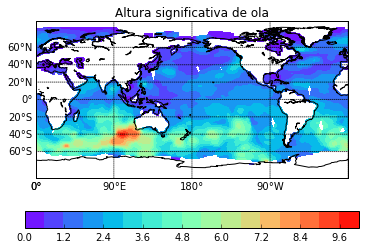

In [9]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline
A = netCDF4.Dataset('/home/giuli/Descargas/nrt_merged_mswh_20160731_20160731_20160803.nc','r') 
print(A.variables.keys()) # Nombres de las variables
lat,long = A.variables['NbLatitudes'][:], A.variables['NbLongitudes'][:] # Defino Latitud y Longitud (tipo netcdf)
hs = A.variables['Grid_0001'][:] # Defino la altura significativa (tipo netcdf)
print(type(hs))
hst=hs.T

mapproj = bm.Basemap(projection='cyl',
                     llcrnrlat=-90.0, llcrnrlon=0.0,
                     urcrnrlat=90.0, urcrnrlon=360.0)  #defino proyeccion y limites del mapa
mapproj.drawcoastlines()      #dibujo las costas
mapproj.drawparallels(np.array([-60, -40, -20, 0, 20, 40, 60]), labels=[1,0,0,0])    #DIbujo paralelos
mapproj.drawmeridians(np.array([-180, -90, 0, 90, 180]), labels=[0,0,0,1])
lonall, latall = np.meshgrid(long, lat)        #me creo una grilla
lonproj, latproj = mapproj(lonall, latall)
plt.contourf(lonproj, latproj, hst,18,cmap=plt.cm.rainbow)
plt.colorbar(orientation='horizontal')
plt.title('Altura significativa de ola (m)') # add a title

In [29]:
# Automatizando la bajada de datos..
import urllib.request
f = urllib.request.urlopen('ftp://ftp.aviso.altimetry.fr/pub/oceano/AVISO/wind-wave/nrt/mswh/merged/')
print(f)

<addinfourl at 139796572284520 whose fp = <addclosehook at 139796572284352 whose fp = <_io.BufferedReader name=66>>>
